# Effect of Tournament Types on Soccer Matches

**Authors:** Sjors Klaassen, Tim Rutjens  
**Date:** 04-04-2025  
**Teacher:** Beks, M.  
**Course:** Statistics  

#### Version history
- V0.1 20-03-2025: Created the notebook and setup the core of the document.
- V0.2 27-03-2025: Pick our dataset, and formulate the research question.
- V0.3 04-04-2025: Conduct our first research and create first code snippets with their results.

#### Table of contents
1. [Introduction](#introduction)
2. [Methods](#methods)
3. [Results](#mesults)
4. [Discussion](#discussion)
5. [Sources](#sources)


## Introduction

 **1. What is researched in this document?**  

In this document, the reader will learn more about the effects of tournament types on international soccer matches, specifically in relation to the number of goals scored. The researchers analyze data from international matches since 30-11-1872.  

Before using the data, an initial analysis is performed. In this phase, the researchers explore key aspects of the dataset, such as:  

- Type of data (Categorical, numerical and ordinal data)
- Mean
- Mode
- Distribution

Following the initial analysis, the researchers conduct a chi-squared test to examine the statistical significance of the findings. Since the test requires categorized data, the dataset is carefully prepared to meet these requirements.  

The results of the chi-square test will be discussed, and based on these findings, the researchers will draw a conclusion. By the end of this document, the reader will have a clearer understanding of the effects of tournament types on soccer matches.  


**2. Research question**

How does the tournament type effect the number of goals in international soccer matches?
   
**3. Hypothesis**

The researchers think that in less important tournament types, such as friendlies, local events and regional events, the average number of goals will be higher than in more important tournament types (World cup, Continental cups). The researchers think this because the skill difference in smaller tournaments is way larger than when you play matches in tournaments in which the best of the best play. Therefor there will be less goals, and smaller differences in more important tournaments.
   

## Methods
**1. Gathering data**

To succesfully conduct the research about the number of goals in international matches we need a good dataset first. By searching the internet we found a dataset which fits our research perfectly. We found the dataset on [Kaggle](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017). This data set contains all matches since from 1872 to 2025. The set includes **47,917** data points at the moment of writing this document. The sets also contains data for shootouts, which are matches resulting in penalties. The researchers do not need this data since the researchers only take goals made during the match itself in account. There is also a sheet contianing goals scorers. The researchers also do not take this data in to account because the person who scored the goal does not matter for the research. Lastly, there is a datasheet contianing the former names of teams and clubs. This data set is also not needed for the research.

In [ ]:
#we import required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we load the data set to work with it in future code blocks
data = pd.read_csv('results.csv')

**2. Analyzing and manipulating the data**

**Analysis**

The dataset results has the following collumns which are then categorized in to the datatype(Categorical, numerical or ordinal) and what they mean in the context of the table:

| Column | Datatype   | Meaning in the context |
|:------|:-------------|:--------------|
| Date | Categorical - nominal   | the date of the match          |
| home_team | Categorical - nominal    | the name of the home team          |
| away_team | Categorical - nominal   | the name of the away team          |
| home_score | Numerical - discrete   | the number of goals made by the home team, including extra time, excluding penalty shootouts          |
| away_score | Numerical - discrete   | the number of goals made by the away team, including extra time, excluding penalty shootouts          |
| tournament | Categorical - nominal   | the name of the tournament          |
| city | Categorical - nominal   | the name of the city/town the match is played in          |
| country |  Categorical - nominal   | the name of the country the match is played in         |
|  neutral |  Categorical - binary   | TRUE/FALSE column indicating wether the match was played at a neutral venue          |

Further more, to get a better understanding of the data we want to get the mean, mode and distribution of the total goals made each match.

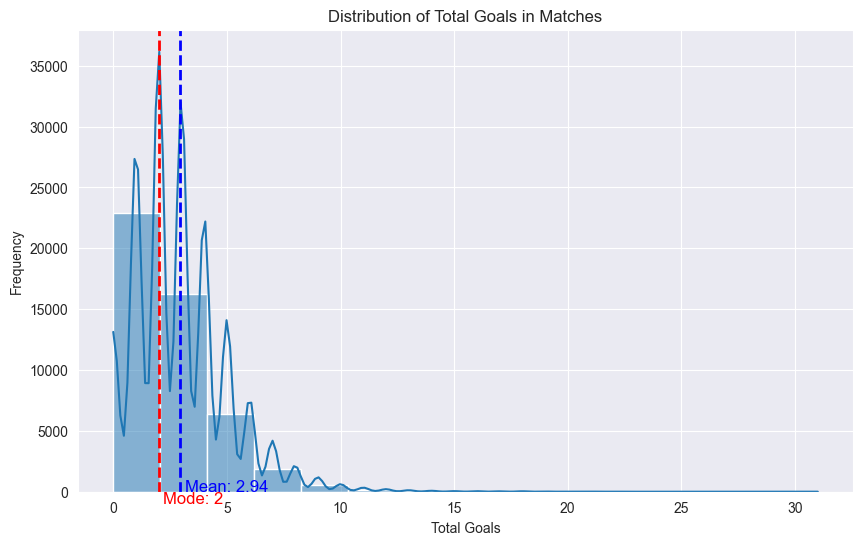

In [ ]:
#first we create a new column for the total goals each match
data['total_goals'] = data['home_score'] + data['away_score']

#we calculate the mean and the mode of the total goals
mean_goals = data['total_goals'].mean()
mode_goals = data['total_goals'].mode()[0]

#we display the mean and the mode and distribution in a plot
plt.figure(figsize=(10, 6))
sns.histplot(data['total_goals'], bins=15, kde=True)
plt.title('Distribution of Total Goals in Matches')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')

plt.axvline(mean_goals, color='blue', linestyle='--', linewidth=2)
plt.axvline(mode_goals, color='red', linestyle='--', linewidth=2)

plt.text(mean_goals + 0.2, 0, f'Mean: {mean_goals:.2f}', color='blue', fontsize=12)
plt.text(mode_goals + 0.2, 0, f'Mode: {mode_goals}', color='red', fontsize=12, verticalalignment='top')

plt.show()

**Manipulating the data**

Since we plan to do a chi-squared test on the data we need to compare 2 types of categorical data. In the table above we can see that the scores are numerical data types. The tournament types are categorical data. To make the test possible we categorize the the numerical variables of the scores. We categorized them as follows:

| Number of goals | Category |
|:------|:-------------|
| 0 | zero |
| 1-3 | little |
| 4-6 | regular |
| 7-10 | many |
| 11+ | extraordinary |

Since there are so many tournament types in the data we also decided to divide them in to subcategories aswell to have better results since some tournaments are only played once for example. So we categorized as follows:

| Tournament level | Meaning in context |
|:------|:-------------|
| Worlds | Stakes are very high, teams perform on world level play |
| Continental | Stakes are quite high, teams play against teams from the whole continent |
| Regional | Stakes are not that high, teams play against other teams in a region |
| Friendly | Stakes are the lowest, friendly matches tend to be less competitive |

By manipulating the data in to these categories we are able to do a chi squared test with meaningful data and not a really high degree of freedom which will give better results and make the test more effective.

**Analysis after manipulating data to workable data**

Now we categorize our data let's plot the same graphs as before without the mean and the mode since it is categorized data right now. But we can still look at the distributions. These distributions of the graphs will give us insight on whether there is differences in the numbers of goals scored in tournament types.

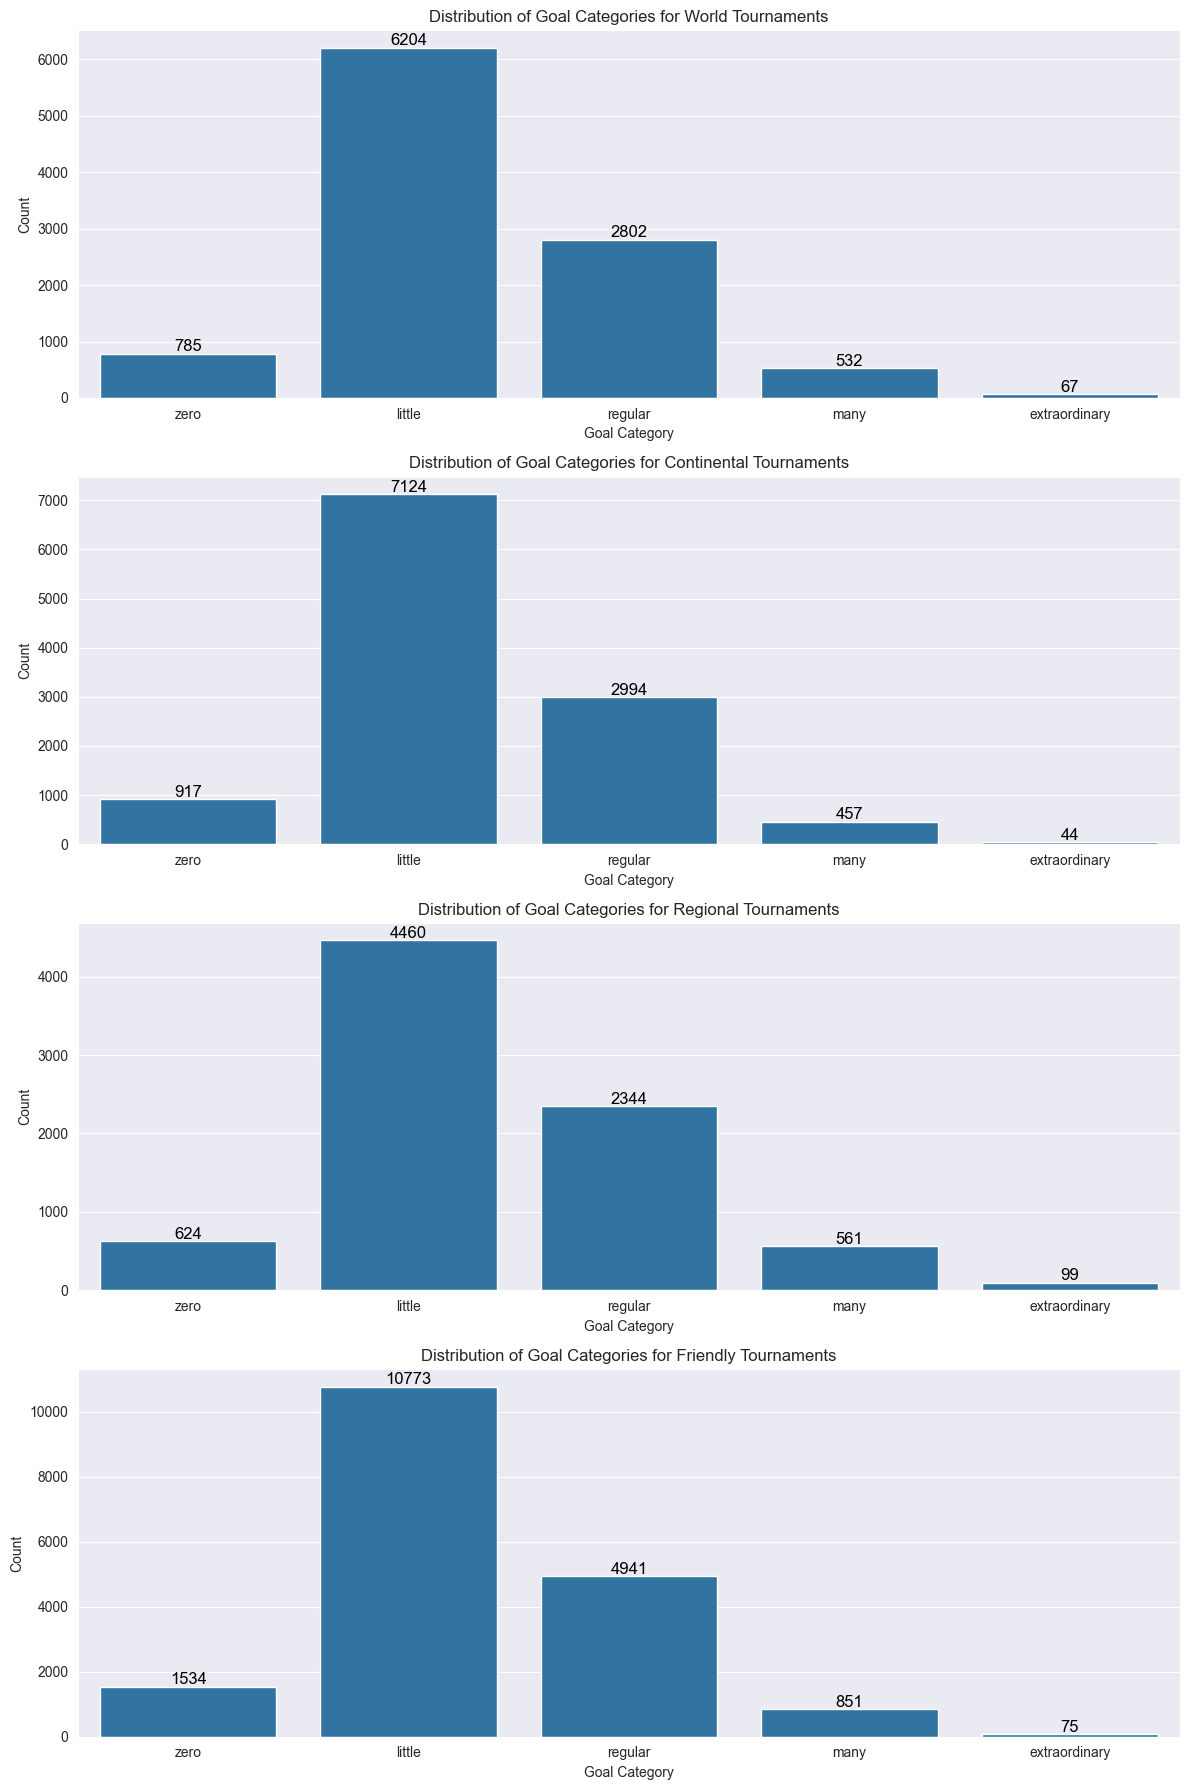

In [ ]:
#categorize the tournaments
world =["FIFA World Cup qualification", "FIFA World Cup", "Island Games", "Confederations Cup", "CONIFA World Football Cup",
        "Nehru Cup", "Olympic Games", "Viva World Cup", "Coupe de l'Outre-Mer", "Lunar New Year Cup", "FIFA Series",
        "Kirin Challenge Cup", "Millennium Cup", "Inter-Allied Games", "King Hassan II Tournament", "FIFI Wild Cup", "VFF Cup",
        "Mundialito", "Nations Cup", "Afro-Asian Games", "Dragon Cup", "OSN Cup", "World Unity Cup", "CONMEBOL–UEFA Cup of Champions",
        "Four Nations' Cup", "Cup of Ancient Civilizations", "ConIFA Challenger Cup", "Real Madrid 75th Anniversary Cup",
        "FIFA 75th Anniversary Cup", "The Other Final", "Benedikt Fontana Cup"]
continental = ["UEFA Euro qualification", "African Cup of Nations qualification",
               "Copa América", "African Cup of Nations", "AFC Asian Cup qualification",
               "UEFA Nations League", "CONCACAF Nations League", "AFC Asian Cup", "Gold Cup", "UEFA Euro",
               "Asian Games", "CONCACAF Championship", "CONCACAF Championship qualification", "Oceania Nations Cup",
               "AFC Challenge Cup", "AFC Challenge Cup qualification", "Gold Cup qualification", "All-African Games",
               "Cyprus International Tournament", "CONCACAF Nations League qualification", "Central American and Caribbean Games",
               "Oceania Nations Cup qualification", "Malta International Tournament", "CONIFA European Football Cup",
               "Copa Chevallier Boutell", "Merlion Cup", "Pacific Mini Games", "Bolivarian Games", "MSG Prime Minister's Cup",
               "Atlantic Cup", "Tournoi de France", "Copa América qualification", "Marlboro Cup", "Superclásico de las Américas",
               "Mapinduzi Cup", "NAFC Championship", "CONIFA World Football Cup qualification", "CONIFA Asia Cup", "NAFU Championship", "CONIFA Africa Football Cup",
               "CONIFA South America Football Cup", "ASEAN Championship qualification"]
regional = ["CECAFA Cup", "CFU Caribbean Cup qualification", "Merdeka Tournament",
            "British Home Championship", "Gulf Cup", "COSAFA Cup", "AFF Championship", "Nordic Championship",
            "CFU Caribbean Cup", "King's Cup", "Amílcar Cabral Cup", "Muratti Vase", "South Pacific Games",
            "Southeast Asian Games", "UNCAF Cup", "SAFF Cup", "Korea Cup", "Arab Cup", "EAFF Championship",
            "Central European International Cup", "CCCF Championship", "WAFF Championship", "Indian Ocean Island Games",
            "Baltic Cup", "Windward Islands Tournament", "Balkan Cup", "Kirin Cup", "Indonesia Tournament", "Pacific Games",
            "UDEAC Cup", "South Asian Games", "Southeast Asian Peninsular Games", "AFF Championship qualification",
            "Vietnam Independence Cup", "Palestine Cup", "West African Cup", "South Pacific Mini Games", "Pan American Championship",
            "USA Cup", "Brazil Independence Cup", "Far Eastern Championship Games", "Dynasty Cup", "Copa Lipton",
            "COSAFA Cup qualification", "ASEAN Championship", "Copa Newton", "Arab Cup qualification", "Copa Roca", "Copa Paz del Chaco",
            "Prime Minister's Cup", "ABCS Tournament", "Inter Games Football Tournament", "Copa del Pacífico", "Copa Rio Branco",
            "East Asian Games", "Intercontinental Cup", "Simba Tournament", "Jordan International Tournament", "Copa Oswaldo Cruz",
            "ELF Cup", "Copa Carlos Dittborn", "Copa Juan Pinto Durán", "Kuneitra Cup", "Copa Premio Honor Uruguayo",
            "UNIFFAC Cup", "GaNEFo", "Nile Basin Tournament", "Copa Artigas", "Copa Premio Honor Argentino", "Miami Cup","Rous Cup",
            "SKN Football Festival", "Tournament Burkina Faso", "CAFA Nations Cup", "Copa Bernardo O'Higgins", "Beijing International Friendship Tournament",
            "Four Nations Tournament", "Mahinda Rajapaksa Cup", "Tri Nation Tournament", "Copa Ramón Castilla", "Copa Félix Bogado",
            "Tynwald Hill Tournament", "Mauritius Four Nations Cup", "EAFF Championship qualification", "Joe Robbie Cup", "Great Wall Cup",
            "Corsica Cup", "Dakar Tournament", "Phillip Seaga Cup", "Three Nations Cup", "Zambian Independence Tournament",
            "Hungary Heritage Cup", "Niamh Challenge Cup", "Tri-Nations Series", "Marianas Cup", "Atlantic Heritage Cup",
            "Open International Championship", "Copa Confraternidad", "TIFOCO Tournament", "Évence Coppée Trophy"]
friendly = ["Friendly", "African Friendship Games", "United Arab Emirates Friendship Tournament", "Peace Cup", "Navruz Cup", "Scania 100 Tournament",
            "Guangzhou International Friendship Tournament"]

def categorize_tournament(tournament_name):
    if tournament_name in world:
        return "world"
    elif tournament_name in continental:
        return "continental"
    elif tournament_name in regional:
        return "regional"
    elif tournament_name in friendly:
        return "friendly"
    else:
        return "other"

data['tournament_level'] = data['tournament'].apply(categorize_tournament)

# Calculate total goals for each match
data['total_goals'] = data['home_score'] + data['away_score']

# Categorize total goals into categories: 'zero', 'little', 'regular', 'many', 'extraordinary'
def categorize_goals(total_goals):
    if total_goals == 0:
        return 'zero'
    elif 1 <= total_goals <= 3:
        return 'little'
    elif 4 <= total_goals <= 6:
        return 'regular'
    elif 7 <= total_goals <= 10:
        return 'many'
    else:
        return 'extraordinary'

data['goal_category'] = data['total_goals'].apply(categorize_goals)

# Set up the figure with subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 18))  # 4 rows and 1 column of subplots

# Tournament levels to plot
levels = ["world", "continental", "regional", "friendly"]

# Plotting the count of matches per goal category for each tournament level
for i, level in enumerate(levels):
    subset = data[data['tournament_level'] == level]

    # Count the occurrences of each goal category for the subset
    category_counts = subset['goal_category'].value_counts()

    # Ensure all goal categories are represented even if some have zero occurrences
    category_counts = category_counts.loc[['zero', 'little', 'regular', 'many', 'extraordinary']].fillna(0)

    # Plot a bar chart
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[i])

    # Set the title and labels
    axes[i].set_title(f'Distribution of Goal Categories for {level.capitalize()} Tournaments')
    axes[i].set_xlabel('Goal Category')
    axes[i].set_ylabel('Count')

    # Add a label for each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         fontsize=12, color='black',
                         xytext=(0, 5), textcoords='offset points')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


**3. Statistical test**

To investigate whether tournament type affects the number of goals in international soccer matches, two main statistical tests were used:

---

##### Chi-square Test of Independence
The Chi-square test was chosen to assess whether there is a significant relationship between tournament type (a categorical variable) and goal frequency (also treated categorically). This test is useful for determining if different categories of a variable are associated with different distributions of another variable.

- **Assumptions**:
  - Observations must be independent.
  - Expected frequencies should be sufficiently large (usually ≥ 5).

This test helps determine whether the observed frequencies of goals across different tournament types deviate significantly from what would be expected if tournament type had no effect.

---

##### Kruskal-Wallis H Test
The Kruskal-Wallis test is a non-parametric alternative to one-way ANOVA. It was used to evaluate whether the distribution of goals scored differs significantly across tournament types without assuming normality.

- **Assumptions**:
  - Observations are independent.
  - The dependent variable (goal counts) is at least ordinal.
  - The groups are mutually independent.

This test is especially appropriate when the data is skewed or when variances across groups are unequal, which is common with goal-scoring data in sports.

By using both tests, the researchers can validate findings from different statistical perspectives—frequency distribution (Chi-square) and score distribution (Kruskal-Wallis).



## Results

To evaluate whether the type of tournament influences the number of goals scored in international soccer matches, a combination of statistical tests was applied, including the Chi-square test of independence and the Kruskal-Wallis H test.

---

### 1. Chi-square Test of Independence

The Chi-square test was used to determine whether there is a statistically significant association between tournament type and the distribution of goals scored. The test yielded the following results:

- **Chi-square statistic**: 225.61  
- **Degrees of freedom**: 16  
- **P-value**: 5.02 × 10⁻³⁹  

The Chi-square statistic reflects the magnitude of deviation between observed and expected goal frequencies across tournament types. A value this high, in combination with an extremely small p-value, provides strong evidence against the null hypothesis — which posits that tournament type and goal scoring are independent.

#### Interpretation:
Given the p-value is far below the conventional significance threshold (e.g., 0.05), we reject the null hypothesis. This means there is a statistically significant relationship between tournament type and how goals are distributed. In simpler terms, the data shows that goal-scoring behavior varies depending on the type of tournament.

---

### 2. Kruskal-Wallis H Test

The Kruskal-Wallis H test was used to examine whether the distributions of goals differ significantly among the various tournament types. This test is particularly appropriate because it does not assume a normal distribution of the data. The results were as follows:

- **H-statistic**: 116.68  
- **P-value**: 2.74 × 10⁻²⁴  

The H-statistic measures how distinct the rankings of goal counts are across groups. A high value, like the one observed here, indicates substantial differences in ranks. The extremely low p-value again leads us to reject the null hypothesis, which states that all groups come from the same distribution.

#### Interpretation:
There are statistically significant differences in the number of goals scored across different tournament types. This supports the idea that certain tournament contexts are more "goal-heavy" or "goal-restrictive" than others. For example, friendly matches may have more open play and looser defenses, while major tournaments like the World Cup could involve tighter strategies.

---

### 3. Descriptive Statistics

To better understand the nature of these differences, descriptive statistics were calculated for each tournament category:

| Tournament Type | Mean Goals | Median Goals | Std. Dev. | Match Count |
|------------------|-------------|----------------|-------------|----------------|
| Friendly          | 2.89         | 3.00              | 2.02         | 18,174           |
| Regional          | 3.21         | 3.00              | 2.39         | 8,088             |
| World             | 2.97         | 3.00              | 2.14         | 10,390           |
| Continental       | 2.82         | 3.00              | 1.94         | 11,536           |
| Other             | 2.26         | 2.00              | 1.69         | 19                |

Notably:
- **Regional tournaments** had the highest average number of goals (3.21), suggesting they may feature more offensive play or mismatched teams.
- The **median goal count** was 3.00 for most categories, but the variation in standard deviation and mean reflects differing scoring dynamics.

### 4. Statistical vs. Practical Significance

While both tests show highly significant results, it is important to recognize that statistical significance does not automatically imply practical significance. Due to the large sample sizes involved, even minor differences in means can result in very small p-values.

The actual differences in average goals per tournament type are modest (e.g., 2.82 vs. 3.21), and the medians are virtually identical across major tournament categories. Therefore, although we have strong evidence that some differences exist, their practical impact appears limited. In applied contexts, such as match predictions or strategy analysis, the observed effect may not translate into meaningful differences.


## Discussion

## Sources